<a href="https://colab.research.google.com/github/syedanasiha/AtomCamp/blob/main/Session_01_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:
Develop a predictive model to estimate Student's Performance using linear regression.

### Description:

#### Variables:

- **Previous Scores:** The scores obtained by students in previous tests.

#### Target Variable:

- **Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


### Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [ ]:
data = pd.read_csv("Student_Performance.csv")

In [ ]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
data.drop(['Hours Studied', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced'],inplace=True,axis=1)

### Explore the Data

In [ ]:
data.head()

,Previous Scores,Performance Index
0,99,91.0
1,82,65.0
2,51,45.0
3,52,36.0
4,75,66.0


### Correlation matrix

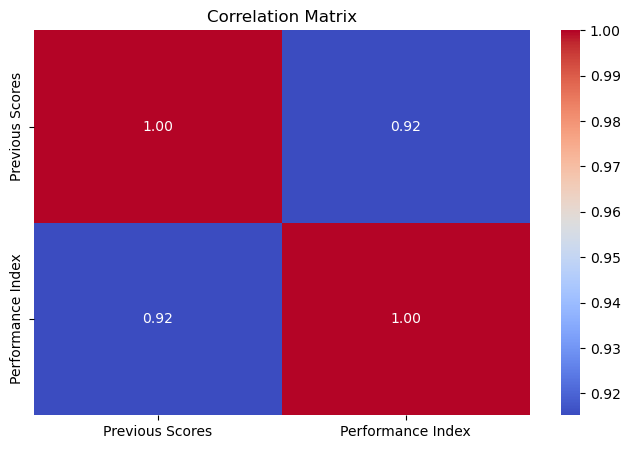

In [ ]:
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Linear regression:

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It is a fundamental technique in the field of machine learning, and statistics.

In simple linear regression, there is one independent variable predicting the dependent variable, while in multiple linear regression, there are multiple independent variables. The goal of linear regression is to find the best-fitting line (or hyperplane in the case of multiple independent variables) that minimizes the difference between the observed values and the values predicted by the linear model.

The equation for simple linear regression is typically represented as:

\[ y = mx + b \]

Where:
- \( y \) is the dependent variable.
- \( x \) is the independent variable.
- \( m \) is the slope of the line.
- \( b \) is the y-intercept.

In multiple linear regression, the equation becomes:

\[ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \]

Where:
- \( y \) is the dependent variable.
- \( x_1, x_2, ..., x_n \) are the independent variables.
- \( b_0, b_1, b_2, ..., b_n \) are the coefficients representing the slopes of the respective independent variables, and \( b_0 \) is the y-intercept.

In [ ]:
data.head()

,Previous Scores,Performance Index
0,99,91.0
1,82,65.0
2,51,45.0
3,52,36.0
4,75,66.0


#### Define Features and Target

In [ ]:
X = data.drop(columns = "Performance Index")
y = data["Performance Index"]

In [ ]:
X.head(2)

,Previous Scores
0,99
1,82


In [ ]:
y.head(2)

0    91.0
1    65.0
Name: Performance Index, dtype: float64

#### Split the dataset into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 1)
y_train shape:  (8000,)
x_test shape:  (2000, 1)
y_test shape:  (2000,)


### Implement a linear regression model.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# fit model

model.fit(X_train,y_train)

LinearRegression()

#### Make predictions on the test set


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

2000

In [ ]:
y_test.count()

2000

In [ ]:
# Actual Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.773742
4684,20.0,31.481016
1731,46.0,41.608288
4742,28.0,27.430107
4521,41.0,38.570107
...,...,...
6412,45.0,55.786469
8285,66.0,64.901014
7853,16.0,25.404653
1095,65.0,68.951923


In [ ]:
# import libraries to model
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared Error: ",r2)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)

R-squared Error:  0.8409297694265205
Mean Squared Error:  58.94905984921965
Mean Absolute Error:  6.557486173405252


In [ ]:
# R-squared in percentage
print("R-squared Error: ",round(r2*100,3),'%')

R-squared Error:  84.093 %


#### Training vs Testing Accuracy

In [ ]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.8367093435629368

In [ ]:
model.score(X_test, y_test)

0.8409297694265205

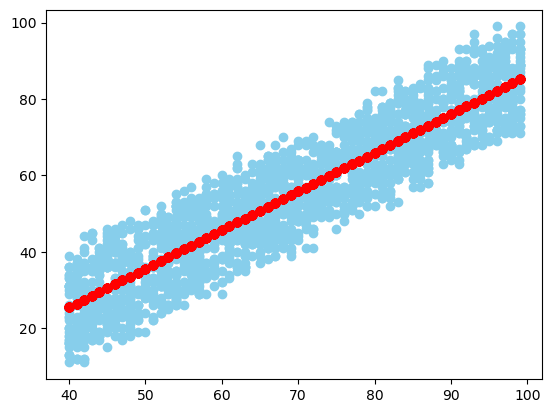

In [ ]:
# Create scatter plot to see distribution

plt.scatter(X_test, y_test,c="skyblue")
plt.scatter(X_test, y_pred,c="red")

plt.show()

<Axes: xlabel='Performance Index', ylabel='Density'>

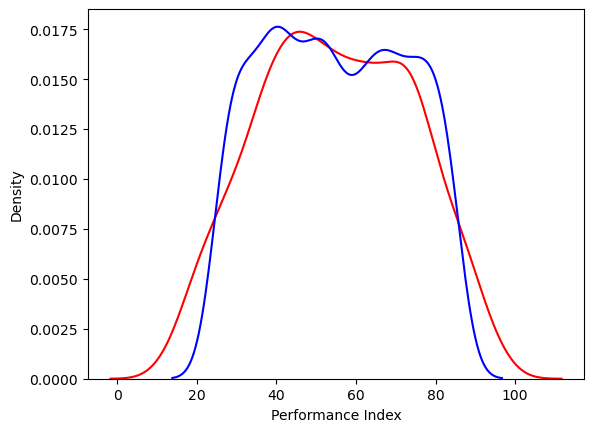

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Model Interpretation:
1. Find coefficients of the linear regression model.


In [ ]:
model.coef_

array([1.0127272])

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coefficients

,Coefficient
Previous Scores,1.012727


2. Find the intercept

In [ ]:
# see y intercept

model.intercept_

-15.104435146091426

In [ ]:
(1.012727*90)-15.104435146091426

76.04099485390856

In [ ]:
model.predict([[90]])

array([76.04101312])